In [1]:
!pip install folium
import pandas as pd
import folium
from folium.plugins import HeatMap
from IPython.display import IFrame
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [4]:
# Load my dataset 
file_path = 'raw-data-2020-2029.csv'  # Update this path to where your file is located
data = pd.read_csv(file_path)
print(data.head())

   _id  count_id  count_date  location_id                       location  \
0    1     39337  2020-01-08        13060  BROADVIEW AVE AT ERINDALE AVE   
1    2     39337  2020-01-08        13060  BROADVIEW AVE AT ERINDALE AVE   
2    3     39337  2020-01-08        13060  BROADVIEW AVE AT ERINDALE AVE   
3    4     39337  2020-01-08        13060  BROADVIEW AVE AT ERINDALE AVE   
4    5     39337  2020-01-08        13060  BROADVIEW AVE AT ERINDALE AVE   

         lng        lat  centreline_type  centreline_id  px  ... ex_peds  \
0 -79.358652  43.677521              2.0       13462138 NaN  ...      60   
1 -79.358652  43.677521              2.0       13462138 NaN  ...      54   
2 -79.358652  43.677521              2.0       13462138 NaN  ...      86   
3 -79.358652  43.677521              2.0       13462138 NaN  ...     105   
4 -79.358652  43.677521              2.0       13462138 NaN  ...     104   

  wx_peds  nx_bike  sx_bike  ex_bike  wx_bike  nx_other  sx_other  ex_other  \
0      

# Heatmap

In [5]:
# Prepare the data for the heatmap: each row as [latitude, longitude, total traffic]
# Assuming dataset contains traffic-related columns 
traffic_columns = [col for col in data.columns if '_cars_' in col or '_truck_' in col or '_bus_' in col or '_peds' in col or '_bike' in col or '_other' in col]
data['total_traffic'] = data[traffic_columns].sum(axis=1)

# Drop rows with missing location data (lat, lng)
data = data.dropna(subset=['lat', 'lng'])

# Create a list of lat, lng, and total_traffic values for the heatmap
heatmap_data = data[['lat', 'lng', 'total_traffic']].values.tolist()

# Create the map centered around Toronto (adjust coordinates if needed)
toronto_map = folium.Map(location=[43.7, -79.4], zoom_start=12)

# Add the heatmap layer
HeatMap(heatmap_data, radius=10, blur=15, max_zoom=1).add_to(toronto_map)

# Save the map to an HTML file
map_path = 'toronto_traffic_heatmap.html'
toronto_map.save(map_path)

# Display the map directly in the notebook using IFrame
IFrame(map_path, width=800, height=600)

# Distribution Plot

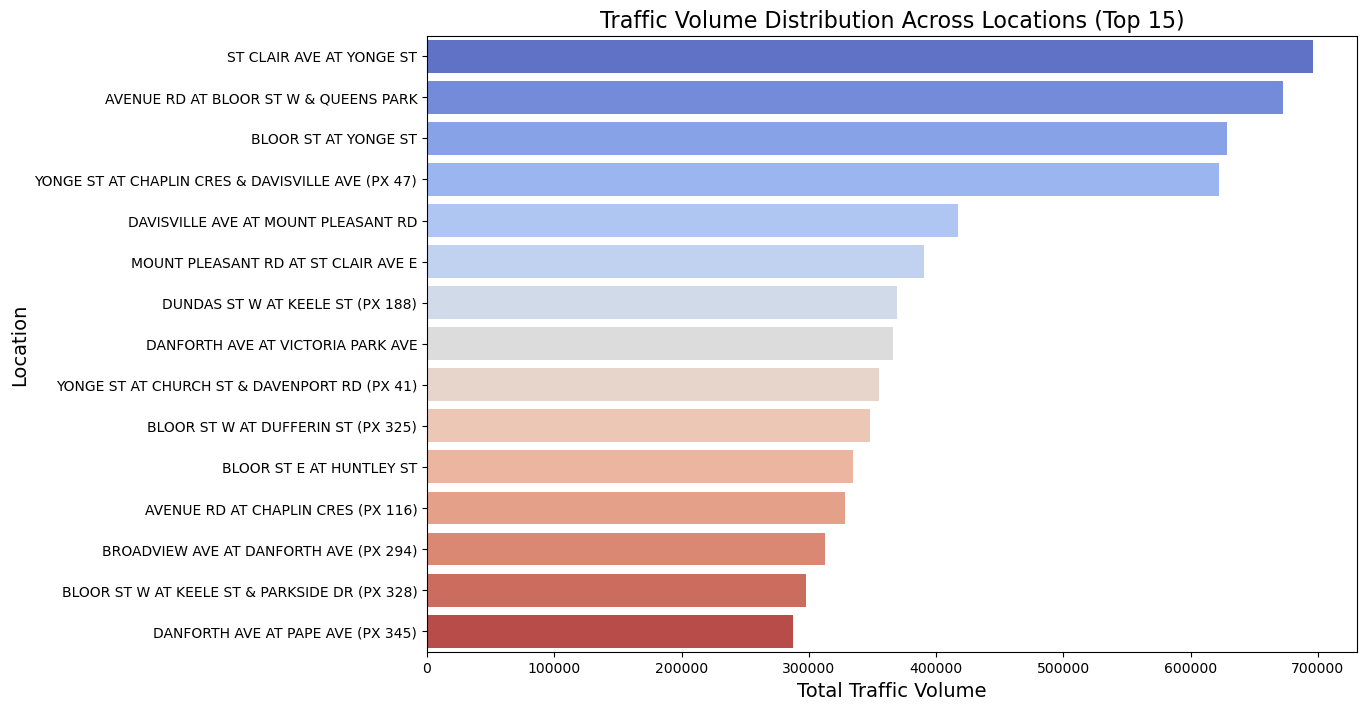

In [6]:
# Group by location to calculate total traffic per location
location_traffic = data.groupby('location')['total_traffic'].sum().sort_values(ascending=False)

# Plot the distribution of traffic across locations
plt.figure(figsize=(12, 8))
sns.barplot(y=location_traffic.index[:15], x=location_traffic.values[:15], palette="coolwarm")
plt.title("Traffic Volume Distribution Across Locations (Top 15)", fontsize=16)
plt.xlabel("Total Traffic Volume", fontsize=14)
plt.ylabel("Location", fontsize=14)
plt.show()